# Multi-Class Classification  

This is a jupyter notebook that showcases an example using scikit-learn for machine learing and multi-class classification using logistic regression and K-nearest neighbor algorithms

#### For this example I will be using the Iris flower data set.

#### This data set consists of 50 samples from three species of Iris totaling 150 samples. There are four features that were measured from each Iris species: the length and width of the sepals and petals. The measurements were taken in centimeters.

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

from sklearn import linear_model
from sklearn.datasets import load_iris

In [2]:
# Load data set
iris = load_iris()

# Setting features
X = iris.data

# Setting target
Y = iris.target

In [3]:
# Taking a look using descr

print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# Making a data frame for the features
iris_data = DataFrame(X, columns= ['Speal Length', 'Sepal Width', 
                                   'Petal Length', 'Petal Width'])

# Making a data frame for the target
iris_target = DataFrame(Y, columns =['Species'])

In [5]:
# Since I know what the data looks like, I know that the target data is
# entered as 0, 1, or 2. I want names so I need to create a function to 
# change those into the species names

def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [6]:
# Applying my function
iris_target['Species'] = iris_target['Species'].apply(flower)

In [7]:
# Combining the data sets to do visualizations
iris = pd.concat([iris_data, iris_target], axis=1)

# Take a look
iris.head()

,Speal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


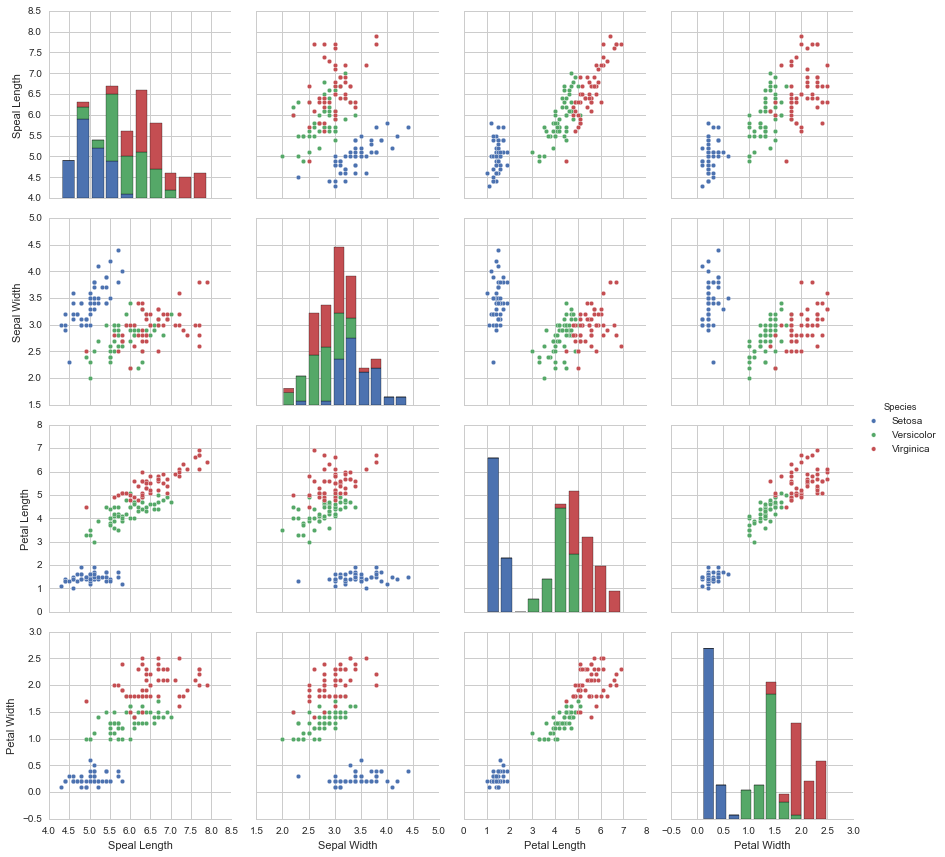

In [8]:
# Making a visualization of the data using a scatter plot to see 
# the feature differences between the species

sns.pairplot(iris, hue = 'Species', size = 3)

#### It's clear to see that Setosa is distinctly different from the other two Iris species. The challenge will be differentiating between Versicolor and Virginica.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [10]:
logreg = LogisticRegression()

# Splitting data into training and testing dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                    test_size= .35, random_state=2)

In [11]:
# Training the model with the training data set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Let's see how accurate the current model is
Y_pred = logreg.predict(X_test)

In [13]:
print metrics.accuracy_score(Y_test, Y_pred)

0.943396226415


#### This model is 94.3% accurate. That's good accuracy given the data set.  

#### One thing to note with machine learning classification is to think about the complexity of the data set and if the accuracy score makes sense. With this data set, that score makes sense. It would be possible to increase the accuracy score if I manipulated the training/ testing data set split and random_state which sets the seed. However for this demonstration purpose, I am satisfied with this accuracy and will do another multi-class classification using the K-nearest neighbor algorithm.

## Next I am going to do multiclass classification using the  K-nearest neighbor algorithm

In [14]:
# Importing method from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Creating an object with K= 6 for classification purpose
knn = KNeighborsClassifier(n_neighbors = 6)

# Fitting the data
knn.fit(X_train, Y_train)

# Running prediction
knn_pred = knn.predict(X_test)

In [16]:
print metrics.accuracy_score(Y_test, knn_pred)

0.981132075472


#### Using the K-nearest neighbor algorithm with K = 6, the model's accuracy score is 98.1%; which is more accurate by 3.8%. Let's see if the model is more accurate with a different K value.

In [17]:
# Creating an object with K= 3 for classification purpose
knn3 = KNeighborsClassifier(n_neighbors = 3)

# Fitting the data
knn3.fit(X_train, Y_train)

# Running prediction
knn3_pred = knn3.predict(X_test)

print metrics.accuracy_score(Y_test, knn3_pred)

0.981132075472


#### Using K= 3, the model maintained the same accuracy score.  

#### To find the optimal K value, I will create a loop that tests various K values and then plot it for visualization.

In [18]:
k_range = range(1,21)
accuracy = list()

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

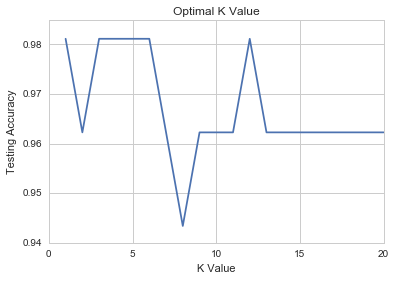

In [19]:
#Plotting the K value test

plt.plot(k_range, accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')
plt.title('Optimal K Value')

#### The optimal K value graph shows the K values and the corresponding accuracy at correctly classifying data. It's not always possible to run this optimal K value test with larger data sets.  

#### With this data set and the train, test, & split values, a K value of 3 will suffice since larger K values do not increase the accuracy. Using the current K-nearest neighbors algorithm, the algorithm will be able to classify new data with 98.1% accuracy. 